## Include Libraries

In [13]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
import seaborn as sns
from scipy import stats

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

## Read CSV file

In [14]:
dataset = pd.read_csv('./Dataset/dataset.csv')
dataset

,Unnamed: 0,Price,Area,Ward,District
0,0,2000000.0,35,Hòa Minh,Liên Chiểu
1,1,2500000.0,35,Mỹ An,Ngũ Hành Sơn
2,2,2000000.0,35,Hòa Cường Nam,Hải Châu
3,3,1700000.0,20,Xuân Hà,Thanh Khê
4,4,2200000.0,18,Hòa Cường Bắc,Hải Châu
...,...,...,...,...,...
4246,4246,1000000.0,16,Hòa Khánh Bắc,Liên Chiểu
4247,4247,4800000.0,30,Hòa Cường Bắc,Hải Châu
4248,4248,1700000.0,20,Mỹ An,Ngũ Hành Sơn
4249,4249,5000000.0,40,Hòa Cường Nam,Hải Châu


## Splitting Continous and Categorical columns


In [15]:
Categorical_cols = ['Ward','District']
Continous_cols = ['Area']

## Data Encryption

### Using Onehot Encoding in Categorical Columns


In [16]:
ohe = OneHotEncoder(sparse=False)
ohe_set = ohe.fit_transform(dataset[Categorical_cols])
ohe_name_col = []
for i in ohe.categories_:
    ohe_name_col+=(i.tolist())

c:\Users\Phan Nhat\anaconda3\envs\KHDL\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Using Standard Scaler in Continous Columns


In [17]:
std = StandardScaler()
std_set = std.fit_transform(dataset[Continous_cols])

## Creating feature dataset

In [18]:
feature_set = pd.concat([pd.DataFrame(data=ohe_set,columns = ohe_name_col), pd.DataFrame(data = std_set, columns = Continous_cols)], axis = 1)
feature_set.columns = feature_set.columns.astype(str)
feature_set.head()

,An Hải Bắc,An Hải Tây,An Hải Đông,An Khê,Bình Hiên,Bình Thuận,Chính Gián,Hòa An,Hòa Cường Bắc,Hòa Cường Nam,...,Vĩnh Trung,Xuân Hà,Cẩm Lệ,Hòa Vang,Hải Châu,Liên Chiểu,Ngũ Hành Sơn,Sơn Trà,Thanh Khê,Area
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.011216
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.011216
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.011216
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.020020
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.021194


## Creating scaler target dataset

In [19]:
target_std = StandardScaler().fit(dataset[['Price']])
target_set = pd.DataFrame(data = target_std.transform(dataset[['Price']]), columns = ['Price'])
target_set.head()

,Price
0,-0.029682
1,-0.027451
2,-0.029682
3,-0.031021
4,-0.028790


## Train and Test splitting

In [24]:
print(feature_set.shape, target_set.shape)
x_train, x_test, y_train, y_test = train_test_split(feature_set, target_set, random_state=0, shuffle=True, test_size=0.2)
x_train.columns = x_train.columns.astype(str)
x_test.columns = x_test.columns.astype(str)

(4251, 55) (4251, 1)


## Preprocessing

### Check missing value

In [27]:
x_train.isna().sum()

An Hải Bắc        0
An Hải Tây        0
An Hải Đông       0
An Khê            0
Bình Hiên         0
Bình Thuận        0
Chính Gián        0
Hòa An            0
Hòa Cường Bắc     0
Hòa Cường Nam     0
Hòa Hiệp Bắc      0
Hòa Hiệp Nam      0
Hòa Hải           0
Hòa Khánh Bắc     0
Hòa Khánh Nam     0
Hòa Khê           0
Hòa Liên          0
Hòa Minh          0
Hòa Phát          0
Hòa Quý           0
Hòa Thuận Tây     0
Hòa Thuận Đông    0
Hòa Thọ Tây       0
Hòa Thọ Đông      0
Hòa Xuân          0
Hải Châu I        0
Hải Châu II       0
Khuê Mỹ           0
Khuê Trung        0
Mân Thái          0
Mỹ An             0
Nam Dương         0
Nại Hiên Đông     0
Phước Mỹ          0
Phước Ninh        0
Tam Thuận         0
Thanh Bình        0
Thanh Khê Tây     0
Thanh Khê Đông    0
Thuận Phước       0
Thạc Gián         0
Thạch Thang       0
Thọ Quang         0
Tân Chính         0
Unknown W         0
Vĩnh Trung        0
Xuân Hà           0
Cẩm Lệ            0
Hòa Vang          0
Hải Châu          0


### Fill missing value

## Predicting

In [25]:
def Get_Score(algo, name):
    algo.fit(x_train, y_train)
    y_pred = algo.predict(x_test)
    x_ax = range(len(y_pred))
    y_pred = y_pred.reshape(851, 1)
    original_set = target_std.inverse_transform(y_test)
    predicted_set = target_std.inverse_transform(y_pred)
    plt.scatter(x_ax, original_set, s= 4, color="blue", label="original")
    plt.plot(x_ax, predicted_set, color="red", label="predicted")
    plt.legend()
    plt.show()
    score = mean_squared_error(y_test,y_pred,squared = False)
    print(name, 'Mean squared error: ',score)
    return predicted_set, original_set

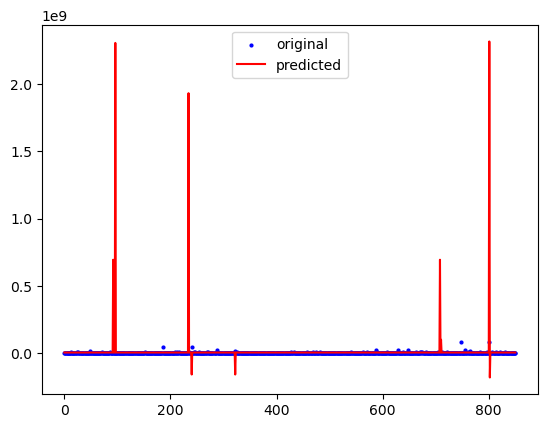

ValueError: Input contains NaN.

In [26]:
lightgb = lgb.LGBMRegressor(n_estimators=500, max_depth=7, min_split_gain=4, min_child_samples=6)
Get_Score(lightgb, 'LightGradientBoosting')